In [13]:
import pandas as pd
import pathlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.preprocessing import normalize
import xgboost as xgb
from collections import defaultdict
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lfc_mb_filt=pd.read_csv(pathlib.Path.cwd().joinpath('cleaned_data','lfc_mb_filt.csv'))
qval_mb_filt=pd.read_csv(pathlib.Path.cwd().joinpath('cleaned_data','qval_mb_filt.csv'))

In [4]:
lfc_cols=list(lfc_mb_filt.filter(regex='log2FC').columns)
qval_cols=list(qval_mb_filt.filter(regex='q_val').columns)

In [9]:
def rf_vanilla(lfc):
    X=lfc[lfc_cols].values
    y=lfc['Functional_Category'].values
    n_classes=lfc['Functional_Category'].nunique()
    #print(X,y)
    accuracy=[]
    confusion=np.zeros((n_classes, n_classes))
    skf = StratifiedKFold(n_splits=3, shuffle=True)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train, y_train=SMOTE().fit_resample(X_train, y_train)
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        y_hat=clf.predict(X_test)
        confusion+=confusion_matrix(y_test, y_hat)
        accuracy.append(accuracy_score(y_test, y_hat))
    print (accuracy)
    confusion=confusion/3
    confusion=normalize(confusion, axis=1, norm='l1')
    confusion=pd.DataFrame(confusion, columns=clf.classes_, index=clf.classes_)
    plt.figure(figsize=(7,7))
    sns.heatmap(confusion, annot=True, linewidths=.1, fmt='1.2f', square=True)
    #return accuracy

[0.3793103448275862, 0.3594704684317719, 0.3846938775510204]


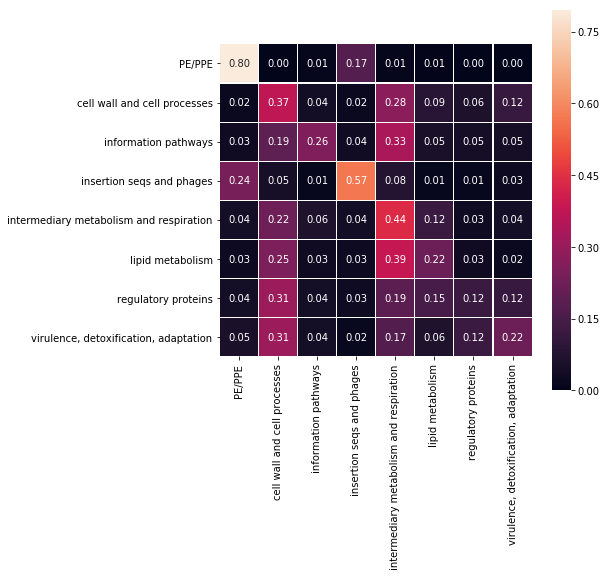

In [10]:
rf_vanilla(lfc_mb_filt)

In [20]:
def xgb_vanilla(lfc):
    X=lfc[lfc_cols].values
    y=lfc['Functional_Category'].values
    n_classes=lfc['Functional_Category'].nunique()
    #print(X,y)
    accuracy=[]
    confusion=np.zeros((n_classes, n_classes))
    skf = StratifiedKFold(n_splits=3, shuffle=True)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train, y_train=SMOTE().fit_resample(X_train, y_train)
        clf=xgb.XGBClassifier(n_estimators=100, max_depth=7)
        clf.fit(X_train,y_train)
        y_hat=clf.predict(X_test)
        confusion+=confusion_matrix(y_test, y_hat)
        accuracy.append(accuracy_score(y_test, y_hat))
    print (accuracy)
    confusion=confusion/3
    confusion=normalize(confusion, axis=1, norm='l1')
    confusion=pd.DataFrame(confusion, columns=clf.classes_, index=clf.classes_)
    plt.figure(figsize=(7,7))
    sns.heatmap(confusion, annot=True, linewidths=.1, fmt='1.2f', square=True)
    #return accuracy

[0.39148073022312374, 0.390020366598778, 0.3836734693877551]


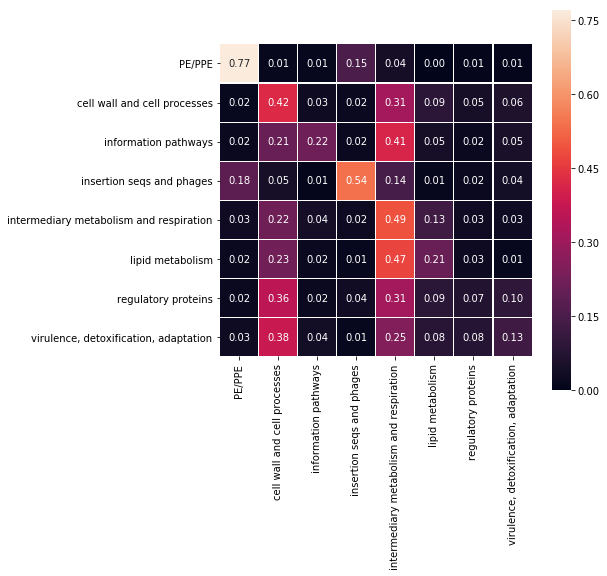

In [21]:
xgb_vanilla(lfc_mb_filt)